In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import folium
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["figure.figsize"] = (10,10)

ppl = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\\서울시_인구수_예측\\ppl.csv',encoding='cp949')
ppl

,Unnamed: 0,구,인구수,년월
0,0,종로구,154619,2018-01
1,1,중구,125786,2018-01
2,2,용산구,229541,2018-01
3,3,성동구,304955,2018-01
4,4,광진구,357785,2018-01
...,...,...,...,...
2195,2196,관악구,488525,2021-07
2196,2197,서초구,418294,2021-07
2197,2198,강남구,530529,2021-07
2198,2199,송파구,658093,2021-07


In [2]:
ppl = ppl.drop(columns = 'Unnamed: 0',axis=1)
ppl

,구,인구수,년월
0,종로구,154619,2018-01
1,중구,125786,2018-01
2,용산구,229541,2018-01
3,성동구,304955,2018-01
4,광진구,357785,2018-01
...,...,...,...
2195,관악구,488525,2021-07
2196,서초구,418294,2021-07
2197,강남구,530529,2021-07
2198,송파구,658093,2021-07


# 송파구

In [3]:
seocho = ppl[ppl['구'].str.contains('송파구')]
seocho = seocho.sort_values('년월')
seocho['년월'] = pd.to_datetime(seocho['년월'],format='%Y-%m')
seocho.set_index('년월',inplace=True)
seocho

,구,인구수
년월,,
2014-04-01,송파구,662947
2014-05-01,송파구,662649
2014-06-01,송파구,662325
2014-07-01,송파구,661742
2014-08-01,송파구,660595
...,...,...
2021-03-01,송파구,661411
2021-04-01,송파구,660160
2021-05-01,송파구,659446


<AxesSubplot:xlabel='년월'>

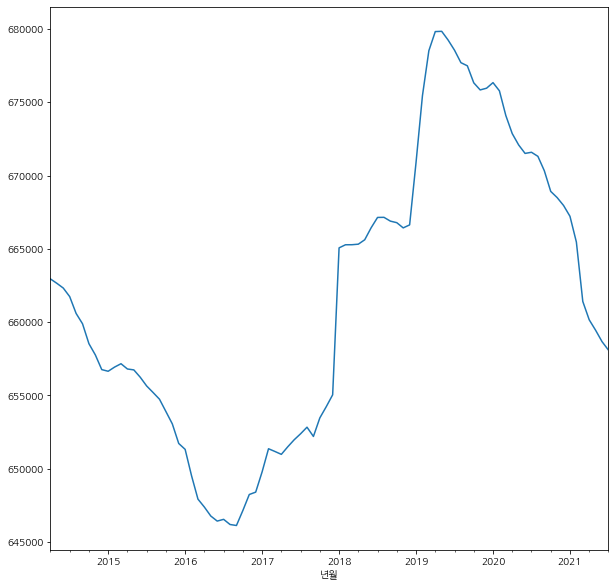

In [6]:
seocho['인구수'].plot()

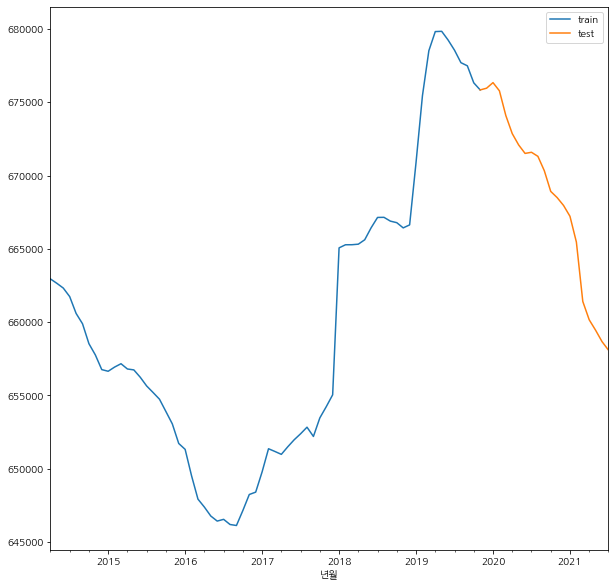

In [7]:
split_date = pd.Timestamp('2019--11-01')

train = seocho.loc[:split_date, ['인구수']]
test = seocho.loc[split_date:, ['인구수']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)


In [9]:
train_scaled_df = pd.DataFrame(train_scaled, columns=['인구수'], index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=['인구수'], index=test.index)
train_scaled_df.head()

,인구수
년월,
2014-04-01,0.498903
2014-05-01,0.490064
2014-06-01,0.480454
2014-07-01,0.463163
2014-08-01,0.429143


In [10]:
for s in range(1, 13):
    train_scaled_df['{}'.format(s)] = train_scaled_df['인구수'].shift(s)
    test_scaled_df['{}'.format(s)] = test_scaled_df['인구수'].shift(s)
train_scaled_df

,인구수,1,2,3,4,5,6,7,8,9,10,11,12
년월,,,,,,,,,,,,,
2014-04-01,0.498903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-01,0.490064,0.498903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-01,0.480454,0.490064,0.498903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-01,0.463163,0.480454,0.490064,0.498903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01,0.429143,0.463163,0.480454,0.490064,0.498903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,0.961769,0.982353,1.000000,0.999466,0.960820,0.869735,0.734547,0.608287,0.602236,0.612765,0.615909,0.623591,0.623384
2019-08-01,0.936529,0.961769,0.982353,1.000000,0.999466,0.960820,0.869735,0.734547,0.608287,0.602236,0.612765,0.615909,0.623591
2019-09-01,0.930211,0.936529,0.961769,0.982353,1.000000,0.999466,0.960820,0.869735,0.734547,0.608287,0.602236,0.612765,0.615909


In [11]:
X_train = train_scaled_df.dropna().drop('인구수', axis=1)
y_train = train_scaled_df.dropna()[['인구수']]

X_test = test_scaled_df.dropna().drop('인구수', axis=1)
y_test = test_scaled_df.dropna()[['인구수']]

y_train

,인구수
년월,
2015-04-01,0.316704
2015-05-01,0.314865
2015-06-01,0.300006
2015-07-01,0.282329
2015-08-01,0.269130
2015-09-01,0.255546
2015-10-01,0.230662
2015-11-01,0.205629
2015-12-01,0.165975


In [12]:
y_test.index

DatetimeIndex(['2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01'],
              dtype='datetime64[ns]', name='년월', freq=None)

In [13]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test_ = y_test.values
X_train

array([[0.327352  , 0.32055997, 0.31210701, 0.31542888, 0.3451477 ,
        0.36789655, 0.40823348, 0.42914343, 0.46316289, 0.48045438,
        0.49006406, 0.4989026 ],
       [0.31670424, 0.327352  , 0.32055997, 0.31210701, 0.31542888,
        0.3451477 , 0.36789655, 0.40823348, 0.42914343, 0.46316289,
        0.48045438, 0.49006406],
       [0.31486535, 0.31670424, 0.327352  , 0.32055997, 0.31210701,
        0.31542888, 0.3451477 , 0.36789655, 0.40823348, 0.42914343,
        0.46316289, 0.48045438],
       [0.30000593, 0.31486535, 0.31670424, 0.327352  , 0.32055997,
        0.31210701, 0.31542888, 0.3451477 , 0.36789655, 0.40823348,
        0.42914343, 0.46316289],
       [0.28232886, 0.30000593, 0.31486535, 0.31670424, 0.327352  ,
        0.32055997, 0.31210701, 0.31542888, 0.3451477 , 0.36789655,
        0.40823348, 0.42914343],
       [0.26913038, 0.28232886, 0.30000593, 0.31486535, 0.31670424,
        0.327352  , 0.32055997, 0.31210701, 0.31542888, 0.3451477 ,
        0.36789655,

In [14]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)
X_train_t.shape

(56, 12, 1)

In [15]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

In [16]:
K.clear_session()
    
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [18]:
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0355
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0341
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0325
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0316
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0313
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0311
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0305
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0300
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0293
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0285
Epoch 11/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0278
Epoch 12/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0272
Epoch 13/100
2/2 [==============================] - 0s 9

In [19]:
y_pred = model.predict(X_test_t)
print("y_test: {}".format(y_test_))
print("y_pred: {}".format(y_pred))

y_test: [[0.57019947]
 [0.54071679]
 [0.500274  ]
 [0.40387988]
 [0.18182815]
 [0.11327269]
 [0.07414511]
 [0.0316199 ]
 [0.        ]]
y_pred: [[0.698954  ]
 [0.6721973 ]
 [0.64555013]
 [0.61931646]
 [0.57900864]
 [0.4901889 ]
 [0.39310655]
 [0.3002136 ]
 [0.21437244]]


In [20]:
y_test.index #20년 11월~21년7월

DatetimeIndex(['2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01'],
              dtype='datetime64[ns]', name='년월', freq=None)

In [21]:
y_pred = scaler.inverse_transform(y_pred)
y_test_ = scaler.inverse_transform(y_test_)

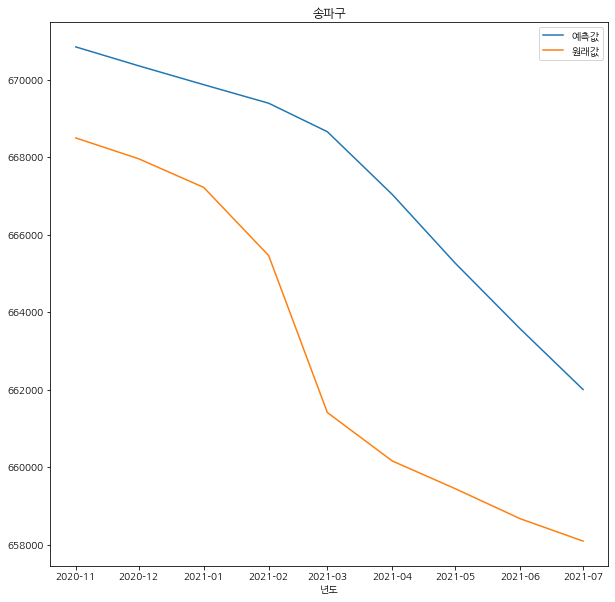

In [22]:
plt.figure(figsize=(10,10))
plt.plot(y_test.index,y_pred,label='예측값')
plt.plot(y_test.index,y_test_, label='원래값')
plt.title('송파구')
plt.xlabel('년도')
plt.legend()
plt.show()

In [33]:
#seocho = seocho.drop(columns='구',axis=1)
new_data = seocho

scaled_data = scaler.fit_transform(new_data)

def create_dataset(X, look_back=1):
    Xs = []
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        
    return np.array(Xs)
X_30 = create_dataset(scaled_data,10)
X_30.shape
len(new_data)

88

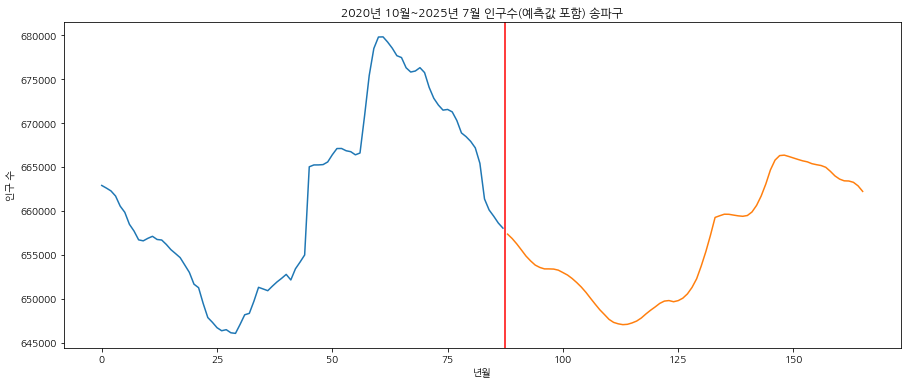

In [35]:
def prediction(model):
    prediction = model.predict(X_30)
    prediction = scaler.inverse_transform(prediction)
    return prediction

forecast = prediction(model)

def plot_multi_step(history, prediction1):
    
    plt.figure(figsize=(15, 6))
    
    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))

    plt.plot(np.arange(range_history), np.array(history), label='실제값')
    plt.plot(range_future, np.array(prediction1),label='미래예측값')
    plt.xlabel('년월')
    plt.title('2020년 10월~2025년 7월 인구수(예측값 포함) 송파구')
    #plt.xlim(0,17)
    plt.axvline(x=87.4, color='r')
    plt.ylabel('인구 수')    
    
plot_multi_step(new_data, forecast)

In [39]:
#미래 데이터 개월 수
range_history = len(new_data)
len(list(range(range_history, range_history + len(forecast))))

48

# new one

In [359]:
def normalize_data(dataset):
    cols = dataset.columns.tolist()
    col_name = [0]*len(cols)
    for i in range(len(cols)):
        col_name[i] = i
    dataset.columns = col_name
    dtypes = dataset.dtypes.tolist()
    minmax = list()
    for column in dataset:
        dataset = dataset.astype({column:'float32'})
    for i in range(len(cols)):
        col_values = dataset[col_name[i]]
        value_min  = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    for column in dataset:
        values = dataset[column].values
        for i in range(len(values)):
            values[i] = (values[i]-minmax[column][0])/ (minmax[column][1]-minmax[column][0])
        dataset[column] = values
    dataset[column] = values
    return dataset, minmax
dataset, minmax = normalize_data(seocho)
values = dataset.values

In [364]:
def split_sequences(sequence, n_steps):
    X,y = list(), list()
    for i in range(len(sequence)):
        end_ix = i+n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

def data_setup(n_steps, n_seq,sequence):
    X,y = split_sequences(sequence, n_steps)
    n_features = X.shape[2]
    X = X.reshape((len(X),n_steps, n_features))
    new_y = []
    for term in y:
        new_term = term[-1]
        new_y.append(new_term)
    return X,np.array(new_y), n_features

n_steps = 10
n_seq = 10000
rel_test_len = 0.1
X,y,n_features = data_setup(n_steps, n_seq,values)
X = X[:-1]
y = y[1:]
X_test, y_test = X[:int(len(X)*rel_test_len)], y[:int(len(X)*rel_test_len)]
X_train, y_train = X[int(len(X)*rel_test_len):], y[int(len(X)*rel_test_len):]
X.shape

(77, 10, 1)

In [395]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM

model = Sequential()
#model.add(LSTM(64,activation=None, input_shape=(10,4),return_sequences=True))
model.add(LSTM(32, activation = None, return_sequences=True))
model.add(Flatten())
model.add(Dense(100,activation=None))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mse',optimizer = 'adam')

In [396]:
model.fit(X_train, y_train, epochs = 5000, batch_size = len(X_train)//4,
         validation_data = (X_test, y_test), verbose=verbosity)

Epoch 1/5000
5/5 - 17s - loss: 0.0595 - val_loss: 0.0239
Epoch 2/5000
5/5 - 0s - loss: 0.0499 - val_loss: 0.0165
Epoch 3/5000
5/5 - 0s - loss: 0.0470 - val_loss: 0.0344
Epoch 4/5000
5/5 - 0s - loss: 0.0414 - val_loss: 0.0502
Epoch 5/5000
5/5 - 0s - loss: 0.0408 - val_loss: 0.0532
Epoch 6/5000
5/5 - 0s - loss: 0.0396 - val_loss: 0.0440
Epoch 7/5000
5/5 - 0s - loss: 0.0364 - val_loss: 0.0347
Epoch 8/5000
5/5 - 0s - loss: 0.0329 - val_loss: 0.0212
Epoch 9/5000
5/5 - 0s - loss: 0.0291 - val_loss: 0.0257
Epoch 10/5000
5/5 - 0s - loss: 0.0259 - val_loss: 0.0205
Epoch 11/5000
5/5 - 0s - loss: 0.0211 - val_loss: 0.0110
Epoch 12/5000
5/5 - 0s - loss: 0.0189 - val_loss: 0.0097
Epoch 13/5000
5/5 - 0s - loss: 0.0144 - val_loss: 0.0025
Epoch 14/5000
5/5 - 0s - loss: 0.0127 - val_loss: 0.0058
Epoch 15/5000
5/5 - 0s - loss: 0.0124 - val_loss: 0.0030
Epoch 16/5000
5/5 - 0s - loss: 0.0118 - val_loss: 0.0030
Epoch 17/5000
5/5 - 0s - loss: 0.0128 - val_loss: 0.0024
Epoch 18/5000
5/5 - 0s - loss: 0.0116 -

In [397]:
y_pred = model.predict(X_test)
print("y_test: {}".format(y_test))
print("y_pred: {}".format(y_pred))

y_test: [0.93691945 0.8867037  0.8563489  0.8539391  0.86859185 0.8865483
 0.8811069 ]
y_pred: [[0.8798784 ]
 [0.832565  ]
 [0.6561393 ]
 [0.523803  ]
 [0.62751156]
 [0.651044  ]
 [0.8231969 ]]


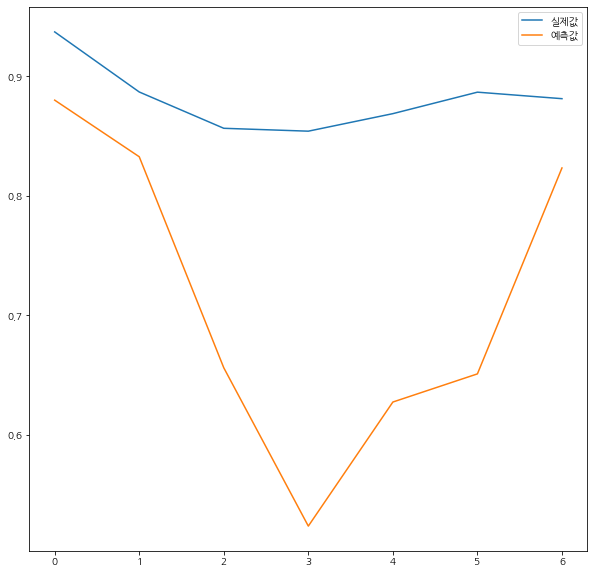

In [400]:
plt.figure(figsize=(10,10))
plt.plot(y_test,label='실제값')
plt.plot(y_pred, label='예측값')
plt.legend()